In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve,precision_recall_curve
from sklearn.metrics import precision_recall_curve,f1_score, roc_auc_score


In [23]:
df_train = pd.read_csv('../data/train.csv')
df_train

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,2,3,1,0,1,244,10,1,0,0,0,85.85,0,1
1,2,0,0,3,1,0,1,276,9,1,0,0,0,95.00,0,1
2,2,0,1,2,1,0,1,233,10,1,0,0,0,90.00,0,1
3,2,0,2,2,1,0,1,156,7,1,0,0,0,93.08,1,1
4,2,0,0,3,1,0,1,76,4,1,0,0,0,69.33,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29015,1,0,2,5,1,0,1,34,11,1,0,0,0,74.80,2,1
29016,2,0,0,2,2,0,1,346,9,0,0,0,0,115.00,1,1
29017,3,0,0,4,1,0,4,175,8,1,0,0,0,130.05,1,1
29018,1,0,0,3,1,0,1,5,12,0,0,0,0,64.80,0,0


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)

X_resampled, y_resampled = rus.fit_resample(X, y)

In [24]:
X = df_train.drop('booking_status', axis=1)
y = df_train['booking_status']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
print(X.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(29020, 15)
(23216, 15)
(23216,)
(5804, 15)
(5804,)


In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
modelo = LogisticRegression()

In [29]:
modelo.fit(X_train_scaled, y_train)

LogisticRegression()

In [30]:
y_pred = modelo.predict(X_test_scaled)

In [49]:
print('Precission', precision_score(y_test,y_pred))
print('Recall', recall_score(y_test, y_pred))
print('Matriz de confusion', confusion_matrix(y_test, y_pred))
print('F1 Score', f1_score(y_test, y_pred))

Accuracy 0.799276361130255
Precission 0.734375
Recall 0.5984084880636604
Matriz de confusion [[3511  408]
 [ 757 1128]]
F1 Score 0.6594562993276819
ROC-AUC-CURVE 0.7471501485993219


<Axes: >

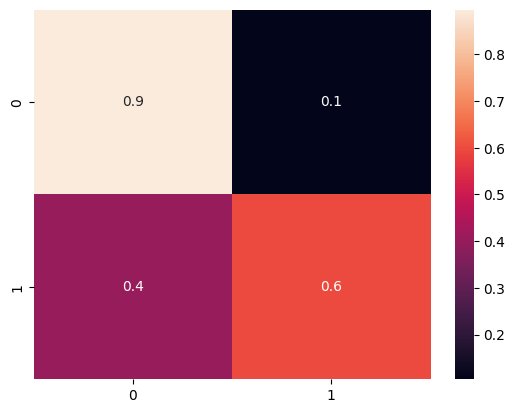

In [32]:
sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true'), annot=True)

HIPERPARAMETRIZACIÓN

In [39]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [1000, 2000, 3000]
}

In [40]:
modelo_hiper = LogisticRegression()

In [41]:
grid_search = GridSearchCV(modelo_hiper, param_grid, cv=5, scoring='accuracy')


In [42]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [1000, 2000, 3000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [43]:
best_params = grid_search.best_params_

In [44]:
best_model = grid_search.best_estimator_

In [45]:
y_pred_hiper = best_model.predict(X_test_scaled)

In [51]:
print('Precission', precision_score(y_test,y_pred_hiper))
print('Recall', recall_score(y_test, y_pred_hiper))
print('Matriz de confusion', confusion_matrix(y_test, y_pred_hiper))
print('F1 Score', f1_score(y_test, y_pred_hiper))

Accuracy 0.7951412818745692
Precission 0.7457627118644068
Recall 0.560212201591512
Matriz de confusion [[3559  360]
 [ 829 1056]]
F1 Score 0.6398061193577703
ROC-AUC-CURVE 0.7341760165906015


In [53]:
y_pred_proba = modelo.predict_proba(X_test_scaled)
y_pred_proba

array([[0.86843305, 0.13156695],
       [0.80695044, 0.19304956],
       [0.90065204, 0.09934796],
       ...,
       [0.1270113 , 0.8729887 ],
       [0.90260621, 0.09739379],
       [0.77432834, 0.22567166]])

In [65]:
roc_auc_score(y_test, y_pred_hiper)

0.7341760165906015

In [56]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

Text(0, 0.5, 'True positive rate')

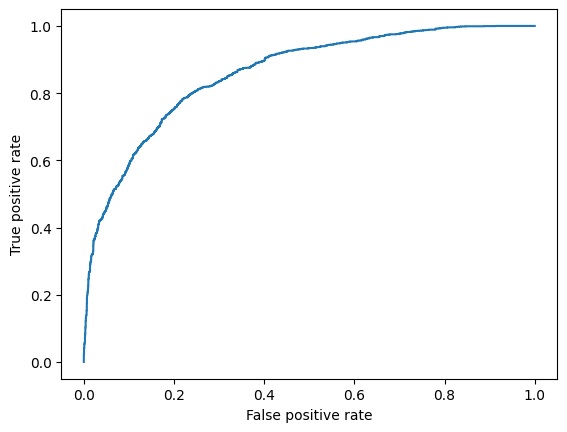

In [57]:
plt.plot(fpr, tpr)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

In [54]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba[:,1])

Text(0, 0.5, 'Precision')

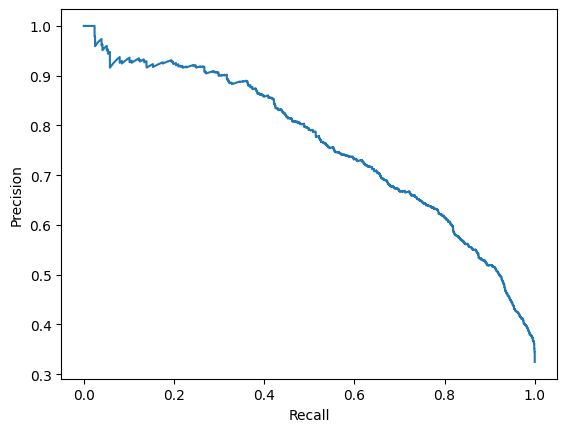

In [55]:
plt.plot(recalls, precisions)
plt.xlabel("Recall")
plt.ylabel("Precision")

In [ ]:
#comparando lo datos, el mejor modelo seria antes de la hiperparametrización

In [58]:
import pickle

In [59]:
with open('trained_model_1.pkl', 'wb') as archivo:
    pickle.dump(modelo, archivo)